In [1]:
import sys
import os

path = os.getcwd()
parent = os.path.dirname(path)
sys.path.append(parent)

In [2]:
from models import  Logistic_Regression_Model
import matplotlib.pyplot as plt
import datetime

In [3]:
stock_models = {}
stock_accuracy = {}
stock_f1_scores = {}
stock_roc_curves = {}

tickers = ["GOOG", "MSFT", "AMZN", "AAPL", "META"]

In [4]:
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2023, 12, 31)

stock_accuracy = {}
stock_f1_scores = {}

In [5]:
for ticker in tickers:
    stock_models[ticker] = Logistic_Regression_Model.Logistic_Regression_Model(ticker, start, end)
    stock_accuracy[ticker], stock_f1_scores[ticker ] = stock_models[ticker].get_metrics()
    stock_roc_curves[ticker] = stock_models[ticker].get_roc_curve()

[*********************100%%**********************]  1 of 1 completed
/home/brian/Desktop/Projects/final_year_project/models/Logistic_Regression_Model.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_'+f'{leng}'] = sma
/home/brian/Desktop/Projects/final_year_project/models/Logistic_Regression_Model.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_'+f'{leng}'] = sma
/home/brian/Desktop/Projects/final_year_project/models/Logistic_Regression_Model.py:61: SettingWithCopyWarning: 
A va

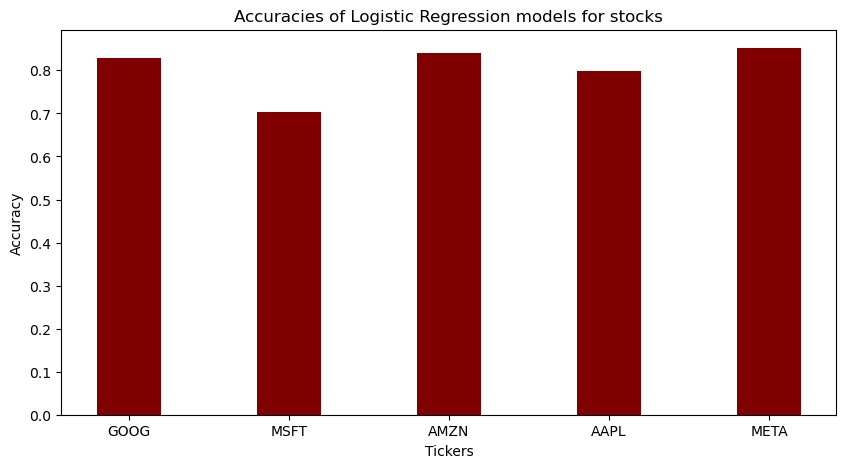

In [6]:
accuracies = list(stock_accuracy.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(tickers, accuracies, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Tickers")
plt.ylabel("Accuracy")
plt.title("Accuracies of Logistic Regression models for stocks")
plt.show()

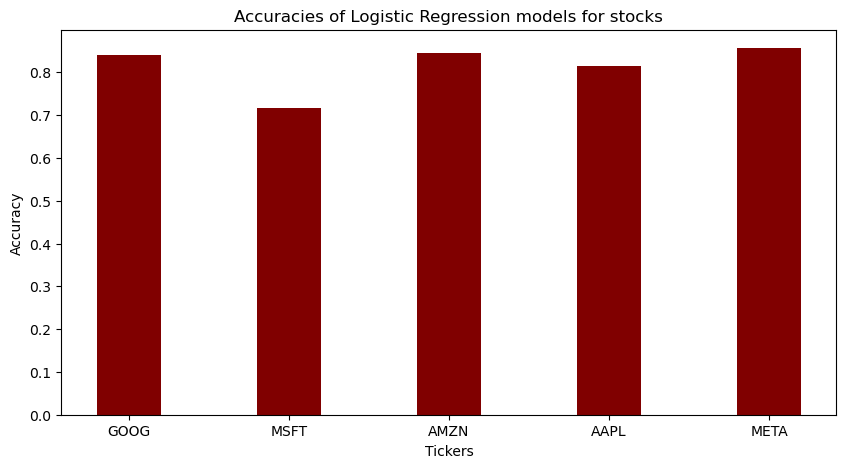

In [7]:
f1_scores = list(stock_f1_scores.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(tickers, f1_scores, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Tickers")
plt.ylabel("Accuracy")
plt.title("Accuracies of Logistic Regression models for stocks")
plt.show()

/tmp/ipykernel_5745/2453904697.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


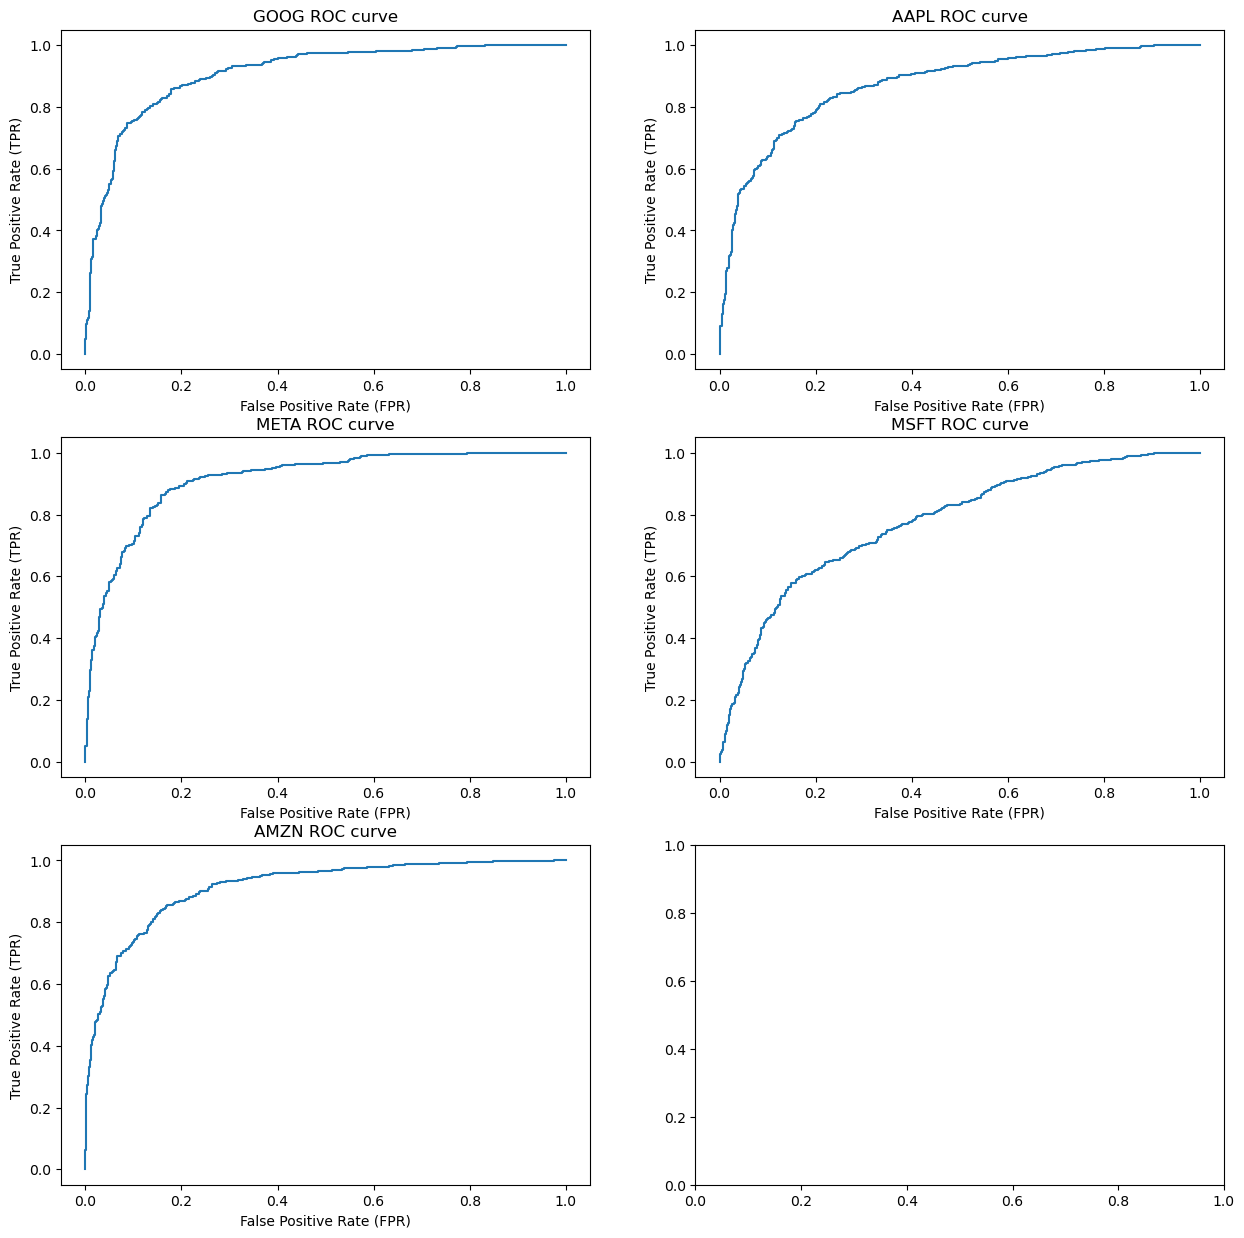

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)
i = j = 0

for ticker in tickers:
    stock_roc_curve = stock_roc_curves[ticker]
    axes[i, j].plot(stock_roc_curve["fpr"], stock_roc_curve["tpr"])
    axes[i, j].set_title(f"{ticker} ROC curve")
    axes[i, j].set_xlabel('False Positive Rate (FPR)')
    axes[i, j].set_ylabel('True Positive Rate (TPR)')
    i = (i + 1) % 3
    j = (j + 1) % 2

fig.show()

In [9]:
stock_models["GOOG"].test

,Open,High,Low,GOOG,Volume,SMA_10,SMA_20,SMA_30,EMA_10,EMA_20,EMA_30,RSI_14,RSI_28,Stoch_Oscillator,Williams_%R,ADX,returns,direction,preds
Date,,,,,,,,,,,,,,,,,,,
2019-05-10,-1.505190,-1.518266,-1.519573,-1.508517,-0.220912,-1.466354,-1.406773,-1.406546,-1.469415,-1.439417,-1.432284,-1.403488,-1.323001,-1.694081,-1.421742,2.063265,0.001625,1,1
2019-05-13,-1.542552,-1.560512,-1.555136,-1.564266,0.637522,-1.493332,-1.414234,-1.408943,-1.485957,-1.450357,-1.439729,-1.986686,-1.909028,-1.723352,-1.714864,2.121568,-0.028082,0,0
2019-05-14,-1.550757,-1.573395,-1.559601,-1.584307,0.599796,-1.505133,-1.422984,-1.413238,-1.503151,-1.462179,-1.448000,-2.162974,-2.095334,-1.816310,-1.893079,2.185505,-0.010291,0,0
2019-05-15,-1.584164,-1.520442,-1.564631,-1.508621,1.311411,-1.505804,-1.428453,-1.415344,-1.503397,-1.465611,-1.450802,-0.910052,-1.045606,-1.664911,-1.002979,1.890650,0.038321,1,1
2019-05-16,-1.503601,-1.491610,-1.484098,-1.483082,0.120041,-1.502965,-1.433438,-1.416908,-1.498934,-1.466264,-1.451758,-0.570074,-0.742365,-1.305625,-0.721093,1.487093,0.012607,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,1.395012,1.381041,1.442959,1.413987,-0.833597,1.226776,1.207818,1.233525,1.274271,1.240306,1.233112,0.973372,0.569948,1.047418,1.254653,-0.800886,0.006467,1,1
2023-12-26,1.424376,1.404854,1.458482,1.417445,-1.409287,1.254943,1.216110,1.243696,1.303399,1.260340,1.248162,0.987994,0.581147,1.241043,1.096173,-0.616733,0.000700,1,1
2023-12-27,1.419194,1.383439,1.407938,1.369721,-0.928409,1.281999,1.221013,1.252753,1.318515,1.273886,1.259128,0.610291,0.362806,1.120783,0.743366,-0.532903,-0.009710,0,0


In [10]:
stock_accuracy

{'GOOG': 0.8297690333618477,
 'MSFT': 0.7023096663815227,
 'AMZN': 0.8400342172797263,
 'AAPL': 0.7989734816082121,
 'META': 0.8518518518518519}

In [11]:
stock_f1_scores

{'GOOG': 0.8399034593724859,
 'MSFT': 0.7161500815660685,
 'AMZN': 0.8458367683429514,
 'AAPL': 0.8139350752177354,
 'META': 0.8568129330254041}